# Pandas (продолжение)

In [16]:
import pandas as pd
import numpy as np
import scipy as sp

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [17]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

In [18]:
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [19]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})
print(df[pd.isna(df["ord_no"]) == True].index)
print(df[pd.isna(df["purch_amt"]) == True].index)
print(df[pd.isna(df["ord_date"]) == True].index)
print(df[pd.isna(df["customer_id"]) == True].index)
print(df[pd.isna(df["salesman_id"]) == True].index)

Int64Index([1, 4, 6, 10], dtype='int64')
Int64Index([1, 5, 8], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([3, 7, 11], dtype='int64')


In [20]:
df.fillna(df.mean())

C:\Users\Maxim\AppData\Local\Temp\ipykernel_13196\634187881.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,NaN,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [21]:
df.fillna(df.median())

C:\Users\Maxim\AppData\Local\Temp\ipykernel_13196\2553712938.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [22]:
df.fillna(df.mode())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70002.0,75.29,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,19.43,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,70005.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,948.50,35.60,2012-07-27,3001,5001.0
6,70012.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,5760.00,98.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [23]:
df.fillna(df.interpolate())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [24]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
#1
diamonds[(diamonds["x"] > 5) & (diamonds["y"] > 5) & (diamonds["z"] > 5)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
...,...,...,...,...,...,...,...,...,...,...
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [26]:
#2
df2 = diamonds.drop(columns = ['cut', 'color', 'clarity'], axis = 1)
df2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
#3
df.mean()

C:\Users\Maxim\AppData\Local\Temp\ipykernel_13196\2270801496.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


ord_no         70006.250000
purch_amt       1376.614444
sale_amt          39.324444
customer_id     3001.833333
salesman_id     5002.000000
dtype: float64

<AxesSubplot: xlabel='cut'>

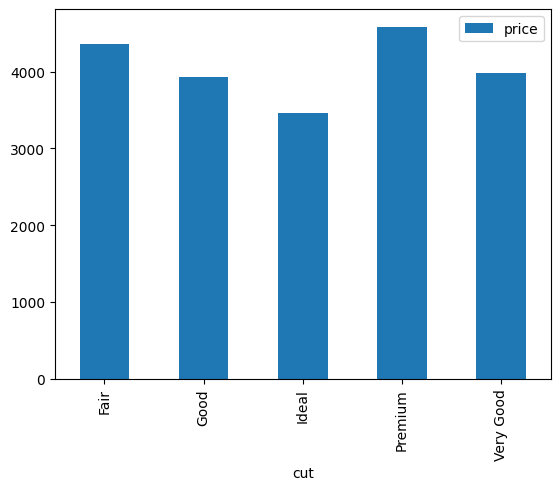

In [29]:
#4
df4 = diamonds.groupby("cut").agg({"price": "mean"})
df4.plot(kind = "bar")

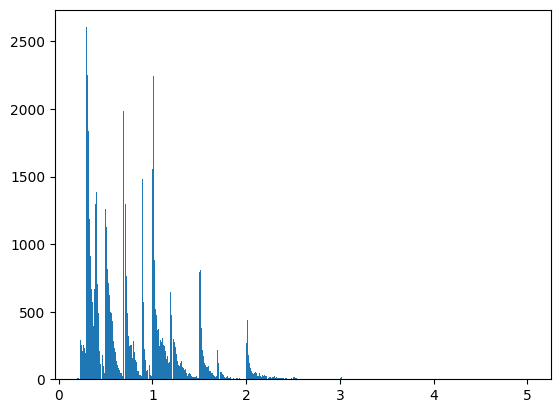

In [30]:
#5
plt.hist(diamonds["carat"], bins = 500)
plt.show()

In [31]:
#6
diamonds.isnull().sum().sum()
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [32]:
#7
res = diamonds.dropna(axis='index', how='any')
res

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
#8
diamonds.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.2 MB


In [35]:
#9
import random
def F9():
    n = np.sort(random.sample(range(len(diamonds)), 20))
    return diamonds.iloc[n]
F9()    

,carat,cut,color,clarity,depth,table,price,x,y,z
1294,0.70,Good,E,VS1,61.0,61.0,2952,5.69,5.72,3.48
4930,0.90,Very Good,I,SI1,60.6,56.0,3730,6.23,6.28,3.79
6582,1.03,Premium,H,SI2,60.7,59.0,4078,6.48,6.54,3.95
10208,1.04,Premium,G,SI1,60.6,61.0,4742,6.63,6.59,4.00
11009,1.10,Premium,H,SI1,63.0,58.0,4916,6.60,6.55,4.14
12232,1.02,Good,D,SI1,57.2,54.0,5198,6.66,6.62,3.80
16197,1.27,Ideal,H,SI1,61.5,55.0,6472,6.97,6.95,4.28
18028,1.09,Ideal,G,VS2,62.8,57.0,7292,6.54,6.58,4.12
18306,1.51,Very Good,I,SI2,60.6,60.2,7441,7.32,7.37,4.45
24289,2.03,Premium,J,SI2,62.7,59.0,12531,8.08,8.02,5.05


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [36]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
#1(a)
pclass = titanic.groupby(['pclass']).agg({"pclass": "count"})
pclass

,pclass
pclass,
1,216
2,184
3,491


In [38]:
#1(b)
ages = titanic.groupby(['age']).agg({"age": "count"})
ages

,age
age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


In [39]:
#2
import numpy as np
tnotnull = titanic.dropna(subset=['age'], how='all')
def group(pclass, sex):
    grop = tnotnull[(tnotnull['pclass'] == pclass) & (tnotnull['sex'] == sex)].sort_values(by="age", ascending = False)
    grop1 = grop[:len(grop)//2]
    grop2 = grop[len(grop)//2:]
    return grop1, grop2
for pclass in range(1, 4):
    for sex in ['male', 'female']:
        print(group(pclass, sex))

(     survived  pclass   sex   age  sibsp  parch      fare embarked  class  \
630         1       1  male  80.0      0      0   30.0000        S  First   
96          0       1  male  71.0      0      0   34.6542        C  First   
493         0       1  male  71.0      0      0   49.5042        C  First   
745         0       1  male  70.0      1      1   71.0000        S  First   
456         0       1  male  65.0      0      0   26.5500        S  First   
54          0       1  male  65.0      0      1   61.9792        C  First   
438         0       1  male  64.0      1      4  263.0000        S  First   
545         0       1  male  64.0      0      0   26.0000        S  First   
555         0       1  male  62.0      0      0   26.5500        S  First   
252         0       1  male  62.0      0      0   26.5500        S  First   
170         0       1  male  61.0      0      0   33.5000        S  First   
625         0       1  male  61.0      0      0   32.3208        S  First  

In [40]:
#3
pclass1_old_male, pclass1_young_male = group(1, 'male')
pclass2_old_male, pclass2_young_male = group(2, 'male')
pclass3_old_male, pclass3_young_male = group(3, 'male')
pclass1_old_female, pclass1_young_female = group(1, 'female')
pclass2_old_female, pclass2_young_female = group(2, 'female')
pclass3_old_female, pclass3_young_female = group(3, 'female')
df = pd.DataFrame({"male younger": [pclass1_young_male['survived'].mean(), pclass2_young_male['survived'].mean(), pclass3_young_male['survived'].mean()],
"male older": [pclass1_old_male['survived'].mean(), pclass2_old_male['survived'].mean(), pclass3_old_male['survived'].mean()],
"female younger": [pclass1_young_female['survived'].mean(), pclass2_young_female['survived'].mean(), pclass3_young_female['survived'].mean()],
"female older": [pclass1_old_female['survived'].mean(), pclass2_old_female['survived'].mean(), pclass3_old_female['survived'].mean()]}, index = ["1", "2", "3"])
df

,male younger,male older,female younger,female older
1,0.509804,0.280000,0.953488,0.976190
2,0.200000,0.102041,0.918919,0.918919
3,0.157480,0.142857,0.490196,0.431373


In [41]:
#4
average_age_of_men = tnotnull[(tnotnull['sex']=='male') & (tnotnull['survived']==1)].agg({'age': 'mean'})[0]
aferage_age_of_woman = tnotnull[(tnotnull['sex']=='female') & (tnotnull['survived']==1)].agg({'age': 'mean'})[0]
print(average_age_of_men, aferage_age_of_woman)

27.276021505376345 28.84771573604061


In [42]:
#5
tnotnull[tnotnull['survived']==1]['age'].std()

14.950951984140426

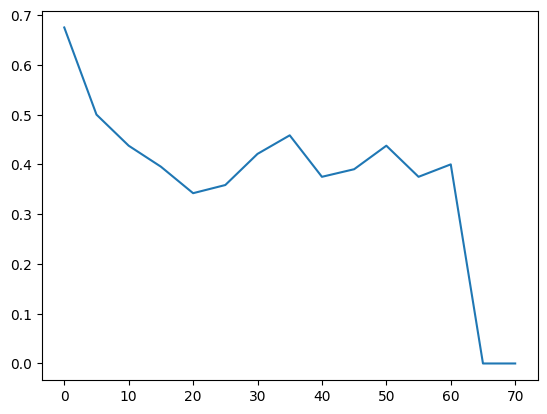

In [43]:
#6
def F6():
    global x, y
    x = []
    y = []
    for i in range(16):
        y.append(tnotnull[(tnotnull['age'] >= 5*i) & (tnotnull['age'] < 5*(i+1))].agg({'survived': 'mean'})[0])
        x.append(i*5)
data()
plt.plot(x, y)

Text(0.5, 1.0, 'Female')

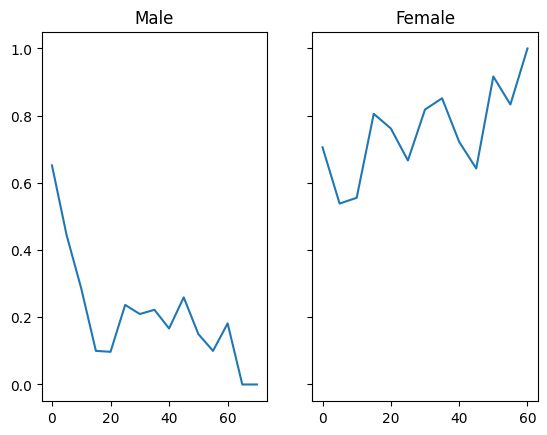

In [44]:
#7
def F7_male():
    global x_male, y_male
    x_male = []
    y_male = []
    for i in range(16):
        y_male.append(tnotnull[(tnotnull['age'] >= 5*i) & (tnotnull['age'] < 5*(i+1)) & (tnotnull['sex']=='male')].agg({'survived': 'mean'})[0])
        x_male.append(i*5)
def F7_female():
    global x_female, y_female
    x_female = []
    y_female = []
    for i in range(16):
        y_female.append(tnotnull[(tnotnull['age'] >= 5*i) & (tnotnull['age'] < 5*(i+1)) & (tnotnull['sex']=='female')].agg({'survived': 'mean'})[0])
        x_female.append(i*5)
F7_male()
F7_female()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x_male, y_male)
ax1.set_title('Male')
ax2.plot(x_female, y_female)
ax2.set_title('Female')

In [45]:
#8
titanic.agg({'fare': 'sum'})[0]

28693.9493